<a href="https://colab.research.google.com/github/holydiver-zerog/repository-public/blob/main/DLtest4_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# list4.1.py
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 37.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=0557575be097f352eed0bba378c97e2f1fc6ff26138281b2d335d8e59601a873
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


In [2]:
# list4.2.py
input_data = [[0, 0], [1, 0], [0, 1], [1, 1]]
xor_data = [0, 1, 1, 0]
x_train = x_test = np.array(input_data)
y_train = y_test = np.array(xor_data)

print("学習データ（問題）：")
print(x_train)
print(f"学習データ（答え）：{y_train}")

学習データ（問題）：
[[0 0]
 [1 0]
 [0 1]
 [1 1]]
学習データ（答え）：[0 1 1 0]


In [3]:
# list4.3.py
model = keras.models.Sequential()
model.add(layers.Dense(8, activation="relu", input_dim=2))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(2, activation="softmax"))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114 (456.00 B)

 Trainable params: 114 (456.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# list4.4.py
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=500,
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7500 - loss: 0.4170 - val_accuracy: 0.7500 - val_loss: 0.4171
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step - accuracy: 0.7500 - loss: 0.4171 - val_accuracy: 0.7500 - val_loss: 0.4165
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.7500 - loss: 0.4165 - val_accuracy: 0.7500 - val_loss: 0.4158
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7500 - loss: 0.4158 - val_accuracy: 0.7500 - val_loss: 0.4151
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7500 - loss: 0.4151 - val_accuracy: 0.7500 - val_loss: 0.4142
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.7500 - loss: 0.4142 - val_accuracy: 0.7500 - val_loss: 0.4134
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.7500 - loss: 0.4134 - val_accuracy: 0.7500 - val_loss: 0.4129
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7500 - loss: 0.4129 - val_accuracy: 0.7500 - val_lo

KeyboardInterrupt: 

NameError: name 'history' is not defined

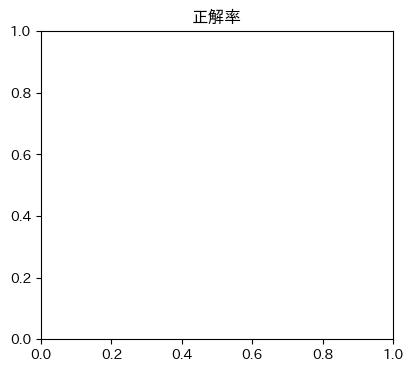

In [8]:
# list4.5.py
param = [["正解率", "accuracy", "val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"], loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

In [9]:
# list4.6.py
pre = model.predict(x_test)
print(pre)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[0.79364306 0.20635691]
 [0.11779253 0.88220745]
 [0.5035081  0.4964919 ]
 [0.5800432  0.4199568 ]]


In [10]:
# list4.7.py
for i in range(4):
    index = np.argmax(pre[i])
    print(f"入力は{x_test[i]}、出力は{index}")

入力は[0 0]、出力は0
入力は[1 0]、出力は1
入力は[0 1]、出力は0
入力は[1 1]、出力は0
